In [34]:
import numpy as np
import skimage.io as io
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas

In [1]:
pip install numpy pandas scikit-image matplotlib

Note: you may need to restart the kernel to use updated packages.


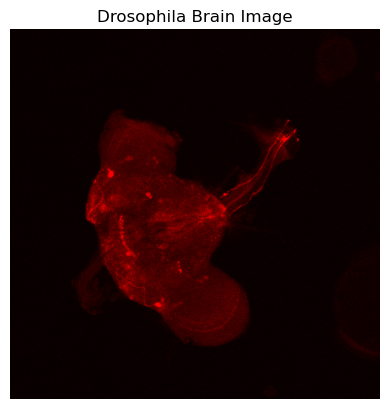

In [3]:
from skimage import io
import matplotlib.pyplot as plt

# 读取图像数据
image_path = "./lecture13/CSB/scientific/data/Kacsoh2013_Drosobrain.png"  # 确保路径正确
image = io.imread(image_path)

# 显示图像
plt.imshow(image)
plt.title("Drosophila Brain Image")
plt.axis("off")
plt.show()


In [6]:
type(image)

numpy.ndarray

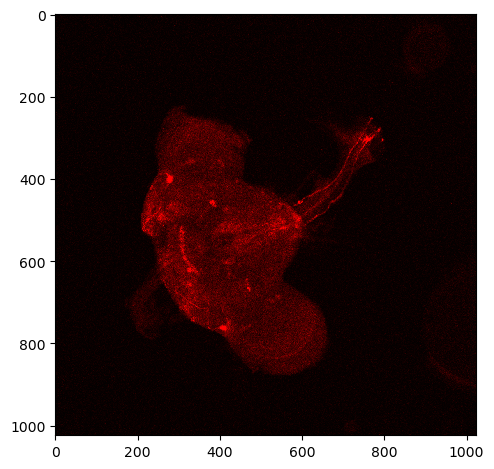

In [7]:
io.imshow(image)

In [13]:
image.shape

(1024, 1024, 3)

In [14]:
image[:,:,0]

array([[ 9,  4,  6, ..., 24,  9,  4],
       [21, 10, 10, ..., 16, 20,  6],
       [ 7, 13, 13, ...,  8,  5, 26],
       ...,
       [ 5,  7,  6, ..., 12,  4, 14],
       [ 3, 24,  4, ...,  5, 10,  3],
       [ 9,  8,  8, ..., 11,  9,  6]], dtype=uint8)

In [15]:
red = image[:,:,0]

In [16]:
red.mean()

np.float64(23.1810245513916)

In [17]:
red.std()


np.float64(30.44674082199301)

In [ ]:
red.min()

np.uint8(0)

In [22]:
red.max()

np.uint8(255)

In [24]:
green = image[:,:,1]
green.mean()

np.float64(0.0)

Counting Red Pixels
We can count the number of red pixels, ie those exhibiting NPF and NPFR1 expression. While there are sophisticated methods to determine the background of an image, here we take the simplest approach and choose an arbitrary threshold of 100 (i.e., intensities below 100 are considered noise, all pixels with a value above this threshold are considered "red" or "expressed"). We can visually inspect how this threshold compares to the rest of the image by setting a part of our picture to 100:


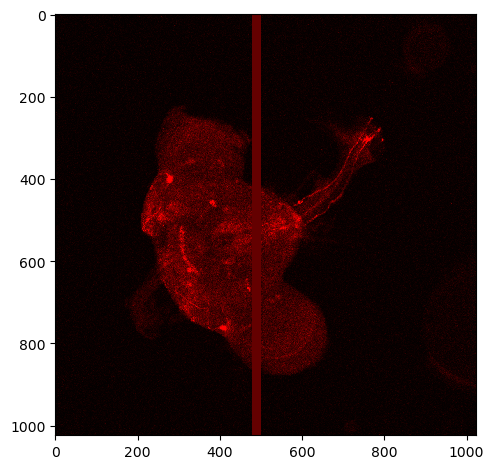

In [27]:
img_copy = image.copy()
img_copy[:, 480:500, 0] = 100
io.imshow(img_copy)

In [29]:
threshold = 100
mask = red > threshold
mask.sum()

np.int64(37037)

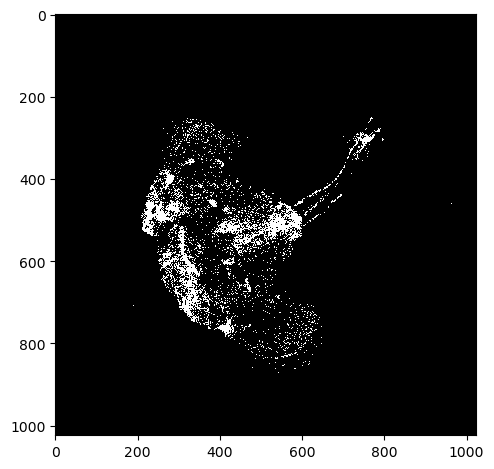

In [30]:
io.imshow(mask)

In [31]:
mask2 = red * (red > threshold)
mask2.sum()

np.uint64(4855070)

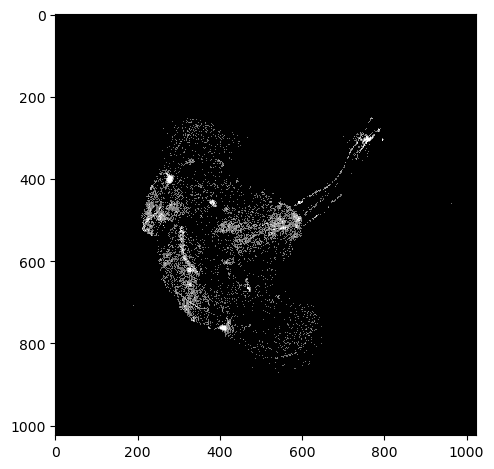

In [32]:
io.imshow(mask2)

In [35]:
import pandas as pd

# 假设有一个 CSV 文件用于分析
data = pd.read_csv("./lecture13/CSB/scientific/data/Dale2015_data.csv")  # 替换为实际文件路径
print("数据前几行：")
print(data.head())

# 简单统计分析
print("\n数据描述：")
print(data.describe())


数据前几行：
            Scientific_name              English_name  \
0    Abroscopus albogularis      Rufous-faced Warbler   
1    Abroscopus schisticeps       Black-faced Warbler   
2  Abroscopus superciliaris    Yellow-bellied Warbler   
3  Acanthagenys rufogularis  Spiny-cheeked Honeyeater   
4       Acanthidops bairdii          Peg-billed Finch   

                   TipLabel  Female_plumage_score  Male_plumage_score  
0    Abroscopus_albogularis             45.833333           51.944444  
1    Abroscopus_schisticeps             48.888889           47.777778  
2  Abroscopus_superciliaris             43.194444           43.611111  
3  Acanthagenys_rufogularis             39.305556           39.166667  
4       Acanthidops_bairdii             40.555556           54.166667  

数据描述：
       Female_plumage_score  Male_plumage_score
count           5831.000000         5831.000000
mean              47.527630           51.009189
std                6.997343            8.200663
min               3

In [ ]:
# Use the attribute shape to determine the numbers of rows and columns of the Data Frame:
data.shape

(5831, 5)

In [39]:
# To see the first few rows in your data set, use the method head. Equivalently, tail returns the last few lines. To access the names of the columns, type:
data.columns

Index(['Scientific_name', 'English_name', 'TipLabel', 'Female_plumage_score',
       'Male_plumage_score'],
      dtype='object')

In [40]:
data["Sum_scores"] = data["Female_plumage_score"] + data["Male_plumage_score"]
data.head()

,Scientific_name,English_name,TipLabel,Female_plumage_score,Male_plumage_score,Sum_scores
0,Abroscopus albogularis,Rufous-faced Warbler,Abroscopus_albogularis,45.833333,51.944444,97.777778
1,Abroscopus schisticeps,Black-faced Warbler,Abroscopus_schisticeps,48.888889,47.777778,96.666667
2,Abroscopus superciliaris,Yellow-bellied Warbler,Abroscopus_superciliaris,43.194444,43.611111,86.805556
3,Acanthagenys rufogularis,Spiny-cheeked Honeyeater,Acanthagenys_rufogularis,39.305556,39.166667,78.472222
4,Acanthidops bairdii,Peg-billed Finch,Acanthidops_bairdii,40.555556,54.166667,94.722222


In [ ]:
# # add a column with a constant
data["Study"] = 1
data.head()

,Scientific_name,English_name,TipLabel,Female_plumage_score,Male_plumage_score,Sum_scores,Study
0,Abroscopus albogularis,Rufous-faced Warbler,Abroscopus_albogularis,45.833333,51.944444,97.777778,1
1,Abroscopus schisticeps,Black-faced Warbler,Abroscopus_schisticeps,48.888889,47.777778,96.666667,1
2,Abroscopus superciliaris,Yellow-bellied Warbler,Abroscopus_superciliaris,43.194444,43.611111,86.805556,1
3,Acanthagenys rufogularis,Spiny-cheeked Honeyeater,Acanthagenys_rufogularis,39.305556,39.166667,78.472222,1
4,Acanthidops bairdii,Peg-billed Finch,Acanthidops_bairdii,40.555556,54.166667,94.722222,1


In [43]:
# use NumPy function to add a column of random numbers
# shape[0] provides the number of rows
data["Rnd"] = np.random.random(data.shape[0])
data.head()

,Scientific_name,English_name,TipLabel,Female_plumage_score,Male_plumage_score,Sum_scores,Study,Rnd
0,Abroscopus albogularis,Rufous-faced Warbler,Abroscopus_albogularis,45.833333,51.944444,97.777778,1,0.284508
1,Abroscopus schisticeps,Black-faced Warbler,Abroscopus_schisticeps,48.888889,47.777778,96.666667,1,0.747230
2,Abroscopus superciliaris,Yellow-bellied Warbler,Abroscopus_superciliaris,43.194444,43.611111,86.805556,1,0.112953
3,Acanthagenys rufogularis,Spiny-cheeked Honeyeater,Acanthagenys_rufogularis,39.305556,39.166667,78.472222,1,0.804228
4,Acanthidops bairdii,Peg-billed Finch,Acanthidops_bairdii,40.555556,54.166667,94.722222,1,0.088641


In [44]:
# remove a single column
del(data["Sum_scores"])
data.head()

,Scientific_name,English_name,TipLabel,Female_plumage_score,Male_plumage_score,Study,Rnd
0,Abroscopus albogularis,Rufous-faced Warbler,Abroscopus_albogularis,45.833333,51.944444,1,0.284508
1,Abroscopus schisticeps,Black-faced Warbler,Abroscopus_schisticeps,48.888889,47.777778,1,0.747230
2,Abroscopus superciliaris,Yellow-bellied Warbler,Abroscopus_superciliaris,43.194444,43.611111,1,0.112953
3,Acanthagenys rufogularis,Spiny-cheeked Honeyeater,Acanthagenys_rufogularis,39.305556,39.166667,1,0.804228
4,Acanthidops bairdii,Peg-billed Finch,Acanthidops_bairdii,40.555556,54.166667,1,0.088641


In [45]:
# remove multiple columns
data.drop(["Rnd", "Study"], axis = 1, inplace = True)
data.head()

,Scientific_name,English_name,TipLabel,Female_plumage_score,Male_plumage_score
0,Abroscopus albogularis,Rufous-faced Warbler,Abroscopus_albogularis,45.833333,51.944444
1,Abroscopus schisticeps,Black-faced Warbler,Abroscopus_schisticeps,48.888889,47.777778
2,Abroscopus superciliaris,Yellow-bellied Warbler,Abroscopus_superciliaris,43.194444,43.611111
3,Acanthagenys rufogularis,Spiny-cheeked Honeyeater,Acanthagenys_rufogularis,39.305556,39.166667
4,Acanthidops bairdii,Peg-billed Finch,Acanthidops_bairdii,40.555556,54.166667


In [46]:
# select data by column label
# select first three rows of output
# remember: noninclusive, 0-based indexing;
# row "3" is not included!
data["Scientific_name"][:3]

0      Abroscopus albogularis
1      Abroscopus schisticeps
2    Abroscopus superciliaris
Name: Scientific_name, dtype: object

In [47]:
# column names can be specified using a dot
data.Scientific_name[:3]

0      Abroscopus albogularis
1      Abroscopus schisticeps
2    Abroscopus superciliaris
Name: Scientific_name, dtype: object

In [48]:
# select rows by index label
# the row named "3" is included!
# select columns by their label
# (multiple labels within list)
data.loc[:3, ["Scientific_name", "English_name"]]

,Scientific_name,English_name
0,Abroscopus albogularis,Rufous-faced Warbler
1,Abroscopus schisticeps,Black-faced Warbler
2,Abroscopus superciliaris,Yellow-bellied Warbler
3,Acanthagenys rufogularis,Spiny-cheeked Honeyeater


In [49]:
# select rows with Scientific_name Zosterops mouroniensis
data.loc[data.Scientific_name == "Zosterops mouroniensis"]

,Scientific_name,English_name,TipLabel,Female_plumage_score,Male_plumage_score
5801,Zosterops mouroniensis,Mount Karthala White-eye,Zosterops_mouroniensis,47.916667,47.5


In [52]:
# select subset by x,y position (zero-based!)
# select third row, second column
data.iloc[2, 1]

'Yellow-bellied Warbler'

In [53]:
# select the column Scientific_name of all rows that
# contain "Bowerbird" in column English_name;
# show first three rows of output
data[data.English_name.str.contains("Bowerbird")]["Scientific_name"][:3]

188      Amblyornis flavifrons
189        Amblyornis inornata
190    Amblyornis macgregoriae
Name: Scientific_name, dtype: object

Filter data


In [54]:
# select rows with Male_plumage_score larger than 65
high_male_score = data[data["Male_plumage_score"] > 65]

In [56]:
# we extract highly sexually dimorphic species by finding those in which males have a high plumage score, and females have a low score:
highly_dimorphic = data[(data.Male_plumage_score > 70) & (data.Female_plumage_score < 40)]

In [60]:
high_male_score["Qualitative_score"] = "High"
high_male_score = data[data["Male_plumage_score"] > 65].copy()
high_male_score["Qualitative_score"] = "High"

/var/folders/tx/xqtj99597b1g3xwmxgm3lrsh0000gn/T/ipykernel_88437/1791147047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_male_score["Qualitative_score"] = "High"


In [62]:
data.Male_plumage_score.mean()

np.float64(51.00918939004288)

In [63]:
data.Male_plumage_score.median()

49.72222222

In [64]:
data.Male_plumage_score.std()

8.200662934673714

<Axes: >

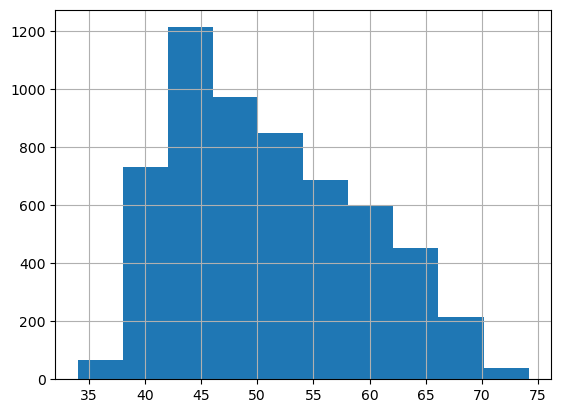

In [65]:
data.Male_plumage_score.hist()

<Axes: xlabel='Male_plumage_score', ylabel='Female_plumage_score'>

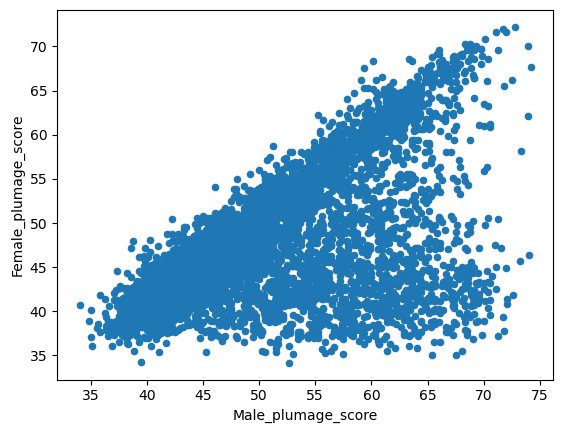

In [66]:
data.plot.scatter(x = "Male_plumage_score", y = "Female_plumage_score")

<Axes: >

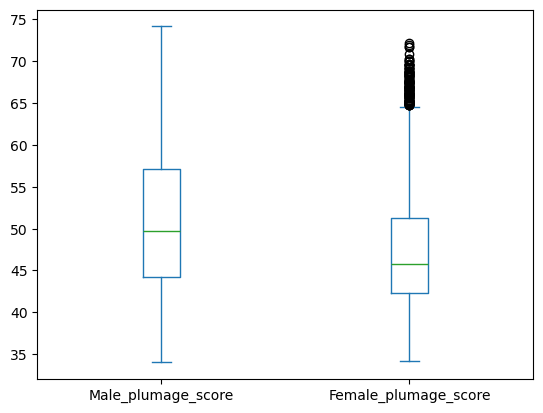

In [67]:
data[["Male_plumage_score", "Female_plumage_score"]].plot.box()